# Exercise 10 - (E12.8)

The required modules:

In [19]:
import numpy as np

from matplotlib import pyplot as plt

Saving the necessary variables:

In [20]:
A = np.array([[2, 0], [0, 4]])  # Quadratic matrix
x0 = np.array([[0], [-1]])      # Initial guess

# Parameters
alpha = 1
gamma = 0.2
eta = 1.5
rho = 0.5
xi = 0.05

Let's define the evaluation function:

In [21]:
def f(xf: np.ndarray):
    return np.squeeze(0.5 * np.dot(np.dot(xf.transpose(), A), xf))

The derivative evaluation function:

In [22]:
def df(xdf: np.ndarray):
    return np.dot(A, xdf)

The Variable Learning Rate Algorithm (VLBP) adopted uses the following logic to minimize the given function, for each iteration:

 1. The displacement with momentum $\Delta x_k$ is computed as: $\Delta x_k = \gamma \Delta x_{k-1} - \alpha(1 - \gamma) \cdot \nabla F(x_k)$
2. The new tentative position of the minimum is then calculated as: $x_{new} = x_{old} + \Delta x$
3. The function is now evaluated in the new point $F(x_{new})$, this value is compared with $F(x_{old})$:
    - if $F(x_{new})$ is **lower** than $F(x_{old})$, the **tentative step is accepted** and the **learning rate increased** $\alpha = \eta \alpha$.
    - if $F(x_{new})$ is **greater** than $F(x_{old}) + 5\%$, the **tentative step is rejected**, **learning rate decreased** $\alpha = \rho \alpha$, and the **momentum set to 0**. $\gamma$ is then reset in the next iteration.
    - if $F(x_{new})$ is **only greater** than $F(x_{old})$, the **tentative step is accepted** but the **learning rate remains unchanged**.

This algorithm is implemented in the following function:

In [23]:
# Variable Learning Rate Algorithm
def VLBP(ff, dff, x0f, alphaf, iters):
    # Init parameters
    gamma_it = gamma  # Gamma used for iterations
    xf = x0f
    dx = np.array([[0], [0]])

    xsf = [x0f]
    alphasf = [alphaf]
    Fsf = [ff(xf)]
    for iteration in range(iters):
        # Delta x
        dx = gamma_it*dx - (1-gamma_it)*alphaf*dff(xf)

        # Update x
        x_next = xf + dx

        # Variable learning check
        if (F_next := ff(x_next)) < (F := ff(xf)):  # Tentative step is accepted, alpha increased
            # Increase alpha and reset gamma
            alphaf = eta*alphaf
            gamma_it = gamma

            # Update x
            xf = x_next
        elif F_next > (1+xi)*F:  # Tentative step is rejected, gamma set to zero, alpha decreased
            # Update alpha and gamma
            alphaf = rho*alphaf
            gamma_it = 0
        else:  # Tentative step accepted, parameters unchanged
            # Reset gamma
            gamma_it = gamma

            # Update x
            xf = x_next

        # Store values
        if np.any(xf != xsf[-1]):
            xsf.append(xf)
        Fsf.append(ff(xf))
        alphasf.append(alphaf)
        print(f"Iteration #{iteration+1}: F_old = {F:.2f} -> F_new = {F_next:.2f}, alpha_new = {alphaf:.4f}, gamma_new = {gamma_it}")
    return xsf, alphasf, Fsf

With the previously-written function we can now perform 3 iterations:

In [24]:
# Number of iterations
iterations = 3

# Apply function
xs, alphas, Fs = VLBP(f, df, x0, alpha, iterations)

Iteration #1: F_old = 2.00 -> F_new = 9.68, alpha_new = 0.5000, gamma_new = 0
Iteration #2: F_old = 2.00 -> F_new = 2.00, alpha_new = 0.5000, gamma_new = 0.2
Iteration #3: F_old = 2.00 -> F_new = 0.08, alpha_new = 0.7500, gamma_new = 0.2


And plot the algorithm progression:

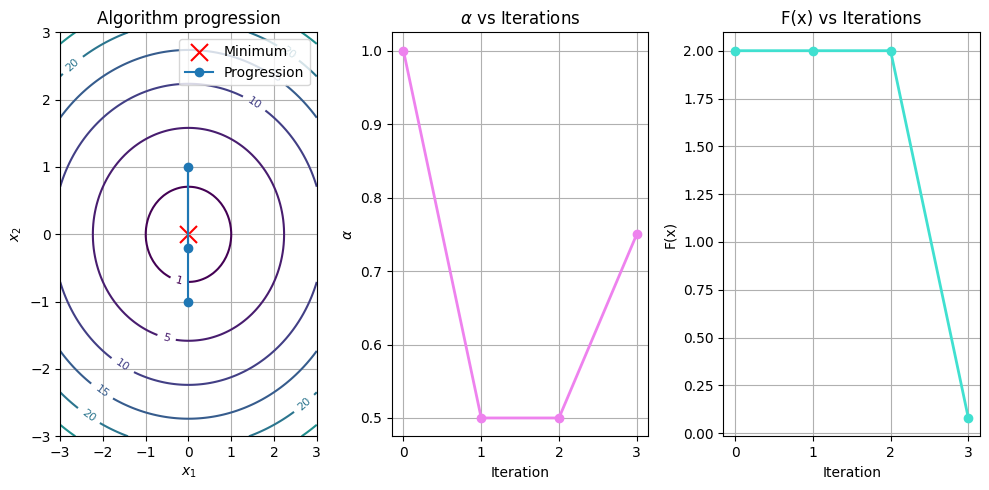

In [25]:
# Create a grid of points to evaluate the function
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

# Evaluate the function at each point in the grid
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = f(x)

# Plot the contour of the function
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
contour_plot = plt.contour(X1, X2, Z, levels=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plot origin
plt.scatter([0], [0], marker='x', s=150, color='red', label='Minimum')

# Plot progress
plt.plot(*list(np.concatenate(xs, axis=1)), '-o', label='Progression')

# Add level labels to the contour plot
plt.clabel(contour_plot, inline=True, fontsize=8)
plt.grid(True)
plt.legend()
plt.title(r'Algorithm progression')

plt.subplot(1, 3, 2)
plt.plot(alphas, "-o", color="violet", linewidth=2)
plt.grid(True)
plt.xlabel(r'Iteration')
plt.ylabel(r'$\alpha$')
plt.title(r'$\alpha$ vs Iterations')

plt.subplot(1, 3, 3)
plt.plot(Fs, "-o", color="turquoise", linewidth=2)
plt.xlabel(r'Iteration')
plt.ylabel(r'F(x)')
plt.grid(True)

plt.title(r'F(x) vs Iterations')
plt.tight_layout()
plt.show()

The algorithm reaches a point close enough to the function minimum $(0, 0)$. If desired, more iterations can be performed to get closer to the minimum and reduce the error, in the following cells the same code as before is used to perform more iterations:

In [26]:
# Number of iterations
iterations = 7

# Apply function
xs, alphas, Fs = VLBP(f, df, x0, alpha, iterations)

Iteration #1: F_old = 2.00 -> F_new = 9.68, alpha_new = 0.5000, gamma_new = 0
Iteration #2: F_old = 2.00 -> F_new = 2.00, alpha_new = 0.5000, gamma_new = 0.2
Iteration #3: F_old = 2.00 -> F_new = 0.08, alpha_new = 0.7500, gamma_new = 0.2
Iteration #4: F_old = 0.08 -> F_new = 0.00, alpha_new = 1.1250, gamma_new = 0.2
Iteration #5: F_old = 0.00 -> F_new = 0.01, alpha_new = 0.5625, gamma_new = 0
Iteration #6: F_old = 0.00 -> F_new = 0.01, alpha_new = 0.2812, gamma_new = 0
Iteration #7: F_old = 0.00 -> F_new = 0.00, alpha_new = 0.4219, gamma_new = 0.2


The final algorithm progression:

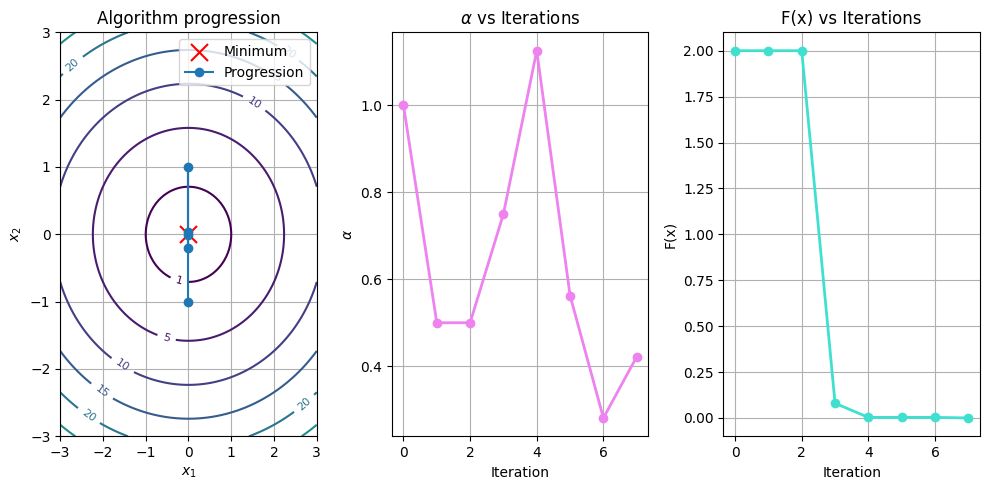

In [27]:
# Create a grid of points to evaluate the function
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

# Evaluate the function at each point in the grid
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = f(x)

# Plot the contour of the function
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
contour_plot = plt.contour(X1, X2, Z, levels=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plot origin
plt.scatter([0], [0], marker='x', s=150, color='red', label='Minimum')

# Plot progress
plt.plot(*list(np.concatenate(xs, axis=1)), '-o', label='Progression')

# Add level labels to the contour plot
plt.clabel(contour_plot, inline=True, fontsize=8)
plt.grid(True)
plt.legend()
plt.title(r'Algorithm progression')

plt.subplot(1, 3, 2)
plt.plot(alphas, "-o", color="violet", linewidth=2)
plt.grid(True)
plt.xlabel(r'Iteration')
plt.ylabel(r'$\alpha$')
plt.title(r'$\alpha$ vs Iterations')

plt.subplot(1, 3, 3)
plt.plot(Fs, "-o", color="turquoise", linewidth=2)
plt.xlabel(r'Iteration')
plt.ylabel(r'F(x)')
plt.grid(True)

plt.title(r'F(x) vs Iterations')
plt.tight_layout()
plt.show()